---
# **Wine data**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
from sklearn.datasets import load_wine
# 차원축소, 모델데이터-학습, 이미지화
wine = load_wine()

In [12]:
wine_std = StandardScaler().fit_transform(wine.data)
wine_std[:3]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818]])

In [13]:
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_std)
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021)

In [15]:
kmeans.fit(wine_std)

KMeans(n_clusters=3, random_state=2021)

In [16]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [17]:
df_w = pd.DataFrame(wine.data, columns=wine.feature_names)
df_w['target'] = wine.target
df_w['cluster'] = kmeans.labels_

In [18]:
df_w['PC1'] = wine_pca[:,0]
df_w['PC2'] = wine_pca[:,1]

In [19]:
df_w.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,PC1,PC2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0,3.316751,-1.443463
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0,2.209465,0.333393
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0,2.516740,-1.031151
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0,3.757066,-2.756372
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0,1.008908,-0.869831


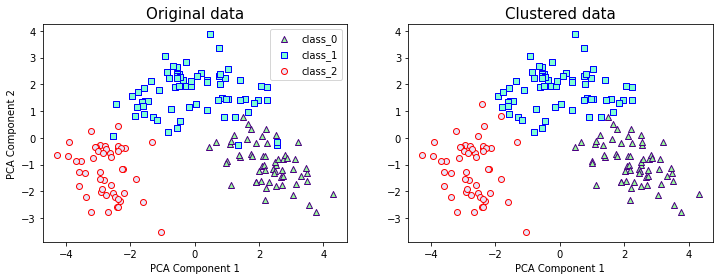

In [21]:
markers = ['^', 's', 'o']
colors = ['palegreen', 'aquamarine', 'lavender']
edgec = ['indigo', 'blue', 'red']
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
for k, column in enumerate(['target', 'cluster']):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = df_w[df_w[column] == i]['PC1']
        y_axis_data = df_w[df_w[column] == i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker=marker, c=colors[i], edgecolors=edgec[i], label=wine.target_names[i])

    if k == 0:
        ax.set_title('Original data', fontsize=15)
        ax.set_ylabel('PCA Component 2')
        ax.legend()
    else:
        ax.set_title('Clustered data', fontsize=15)
    ax.set_xlabel('PCA Component 1')
    
plt.show()